<a href="https://colab.research.google.com/github/PedroMesquitaIsidoro/logicaFuzzy/blob/main/gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalando a biblioteca scikit-fuzzy**

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 28.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a0e6102d072ddcbed6c0a1c2fdda223b80c78d1ab7074651b931389751f59b7e
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

**Antecedentes e Consequente**

In [3]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [4]:
qualidade

Antecedent: qualidade

In [5]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
servico

Antecedent: servico

In [7]:
servico.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')


In [9]:
gorjeta

Consequent: gorjeta

In [10]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

**Funcoes de Pertinencia**

In [11]:
qualidade.automf(number = 3, names = ['ruim', 'boa', 'saborosa'])
servico.automf(number = 3, names = ['ruim', 'aceitavel', 'otimo'])

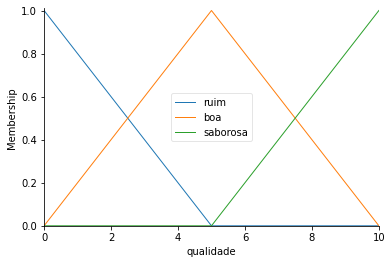

In [12]:
qualidade.view()

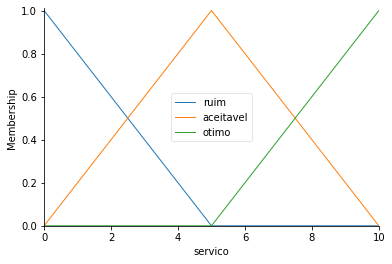

In [13]:
servico.view()

In [14]:
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 10])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 10, 20])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [10, 20, 20])



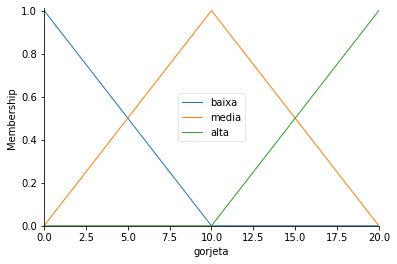

In [15]:
gorjeta.view()

**REGRAS**

In [16]:
#  REGRA 1: SE A QUALIDADE FOR RUIM OU O SERVICO FOR RUIM, ENTAO A GORJETA SERA BAIXA
#  REGRA 2: SE O SERVICO FOR ACEITAVEL, ENTAO A GORJETA SERA MEDIA
#  REGRA 3: SE O SERVICO FOR OTIMO ou QUALIDADE DA COMIDA FOR SABOROSA, ENTAO A GORJETA SERA ALTA

In [17]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitavel'], gorjeta['media'])
regra3 = ctrl.Rule(servico['otimo'] | qualidade['saborosa'], gorjeta['alta'])

***DEFUZZIFICACAO***

In [18]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])
sistema = ctrl.ControlSystemSimulation(sistema_controle)


16.666666666666664


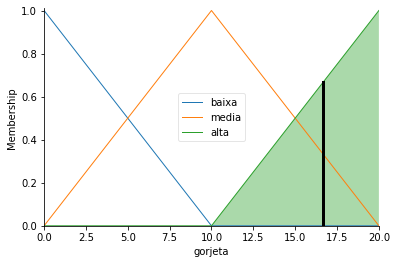

In [19]:
#lugar dos input aqui
sistema.input['qualidade'] = 10
sistema.input['servico'] = 10
sistema.compute()
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)

**OUTRAS FUNCOES**

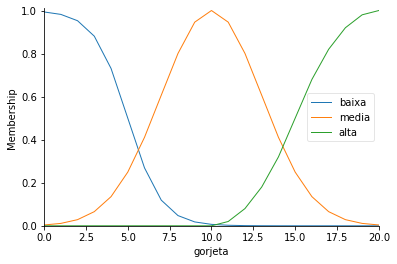

In [20]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)

gorjeta.view()

In [21]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitavel'], gorjeta['media'])
regra3 = ctrl.Rule(servico['otimo'] | qualidade['saborosa'], gorjeta['alta'])

In [22]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])
sistema = ctrl.ControlSystemSimulation(sistema_controle)


17.06666666666667


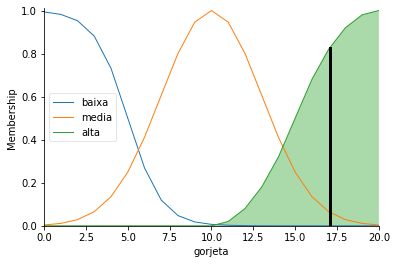

In [23]:
#lugar dos input aqui
sistema.input['qualidade'] = 10
sistema.input['servico'] = 10
sistema.compute()
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)